My prediction task is to predict price of the computer 


The output variable is the price of the laptop. The output variable shows the model prediction 
of the laptop price given the specific set of input in this case the laptop specifications

Several different factors can affect PC prices. 
- the brand of computer
- the amount of memory
- the speed of the processor
- hard drive space.
- many consumers may also look for digital video drivers and other types of recording devices that may affect the prices. 
- branded computers are more expensive than generic versions. 


In [92]:
#importing all the algorythm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, get_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [55]:
#Read the CSV file
pc = pd.read_csv('data/pc_data.csv', header=0)
pc = pc.dropna()
print(pc.shape)
print(list(pc.columns))
pc

(15320, 12)
['Product ID', 'Brand', 'Type', 'Screen Size', 'Screen Specs', 'CPU', 'RAM', 'Hard Disk', 'GPU', 'Operating System', 'Weight', 'Price ($)']


,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,Weight,Price ($)
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568.93416
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394.77616
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531.80000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759.76680
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804.79040
...,...,...,...,...,...,...,...,...,...,...,...,...
15315,15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,1706.40200
15316,15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,4000.10600
15317,15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,616.82600
15318,15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,2042.06600


I visualised the size of the training data, as it is usually recommended to gather a good amount of data to get reliable predictions
and calculated the number of Features as well as the feature types.
Then I picked out a few models and tested their scores.

In [78]:
pc.isnull().sum()

Product ID          0
Brand               0
Type                0
Screen Size         0
Screen Specs        0
CPU                 0
RAM                 0
Hard Disk           0
GPU                 0
Operating System    0
Weight              0
Price ($)           0
dtype: int64

In [79]:
pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15320 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        15320 non-null  int64  
 1   Brand             15320 non-null  object 
 2   Type              15320 non-null  object 
 3   Screen Size       15320 non-null  float64
 4   Screen Specs      15320 non-null  object 
 5   CPU               15320 non-null  object 
 6   RAM               15320 non-null  object 
 7   Hard Disk         15320 non-null  object 
 8   GPU               15320 non-null  object 
 9   Operating System  15320 non-null  object 
 10  Weight            15320 non-null  object 
 11  Price ($)         15320 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 2.0+ MB


I then visualized the dataset to get a clearer idea on the dataset:
 - Countplot to count the number of each categorical data
 - Barchart to show the relationship between the price and a categoric variable
 - Pie Chart for the the show the percentage of the columns

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brand', ylabel='count'>

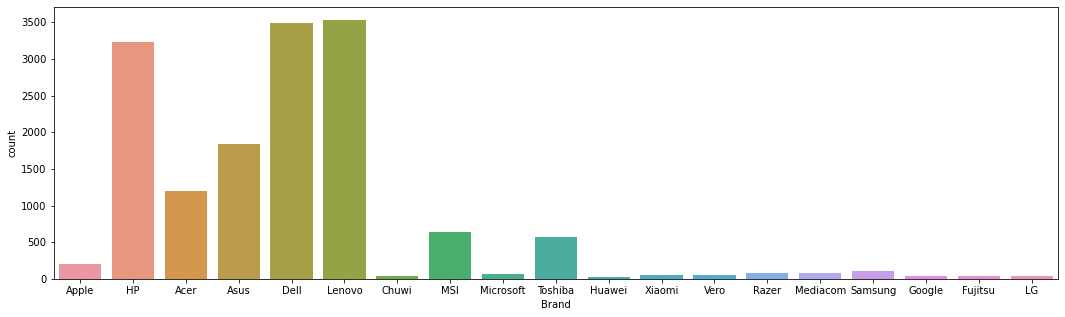

In [60]:
f, ax = plt.subplots(figsize=(18,5))
sns.countplot('Brand',data = pc)

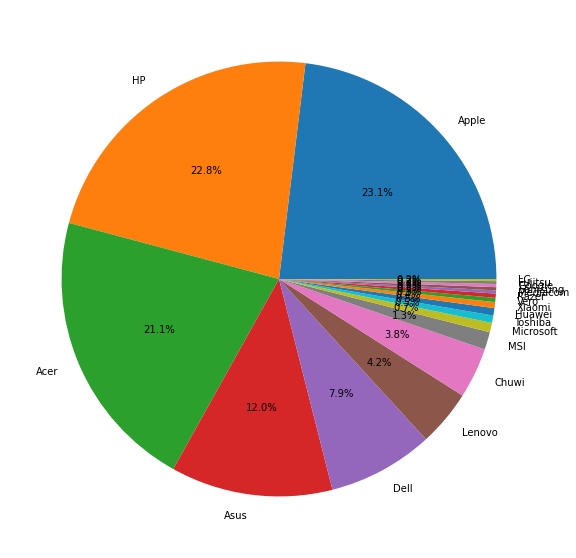

In [61]:
f, ax = plt.subplots(figsize=(10,10))
a = pc['Brand']
b = a.value_counts(normalize=True) * 100
my_labels = ['Apple','HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer', 'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']
plt.pie(b,labels=my_labels,autopct='%1.1f%%')
plt.show()

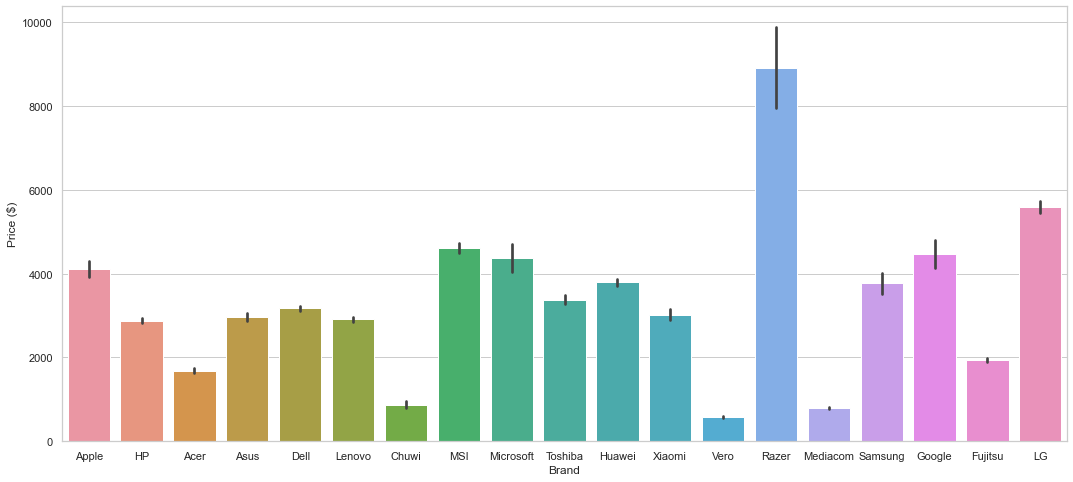

In [75]:
sns.set_theme(style="whitegrid")
plt.figure(1,figsize=(18,8))
ax = sns.barplot(x="Brand", y="Price ($)", data=pc)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

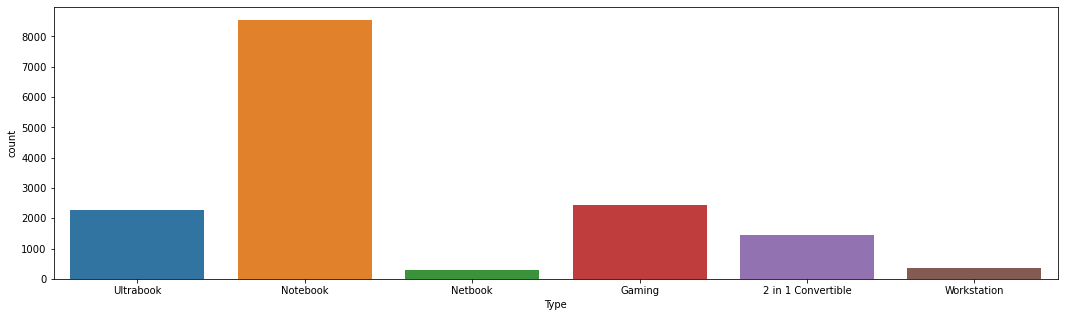

In [56]:
f, ax = plt.subplots(figsize=(18,5))
sns.countplot('Type',data = pc)

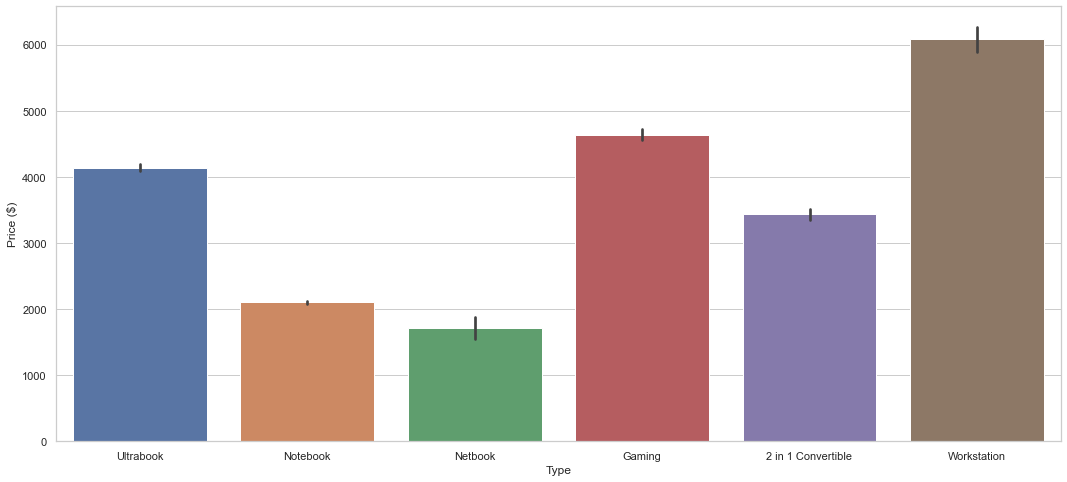

In [76]:
sns.set_theme(style="whitegrid")
plt.figure(1,figsize=(18,8))
ax = sns.barplot(x="Type", y="Price ($)", data=pc)

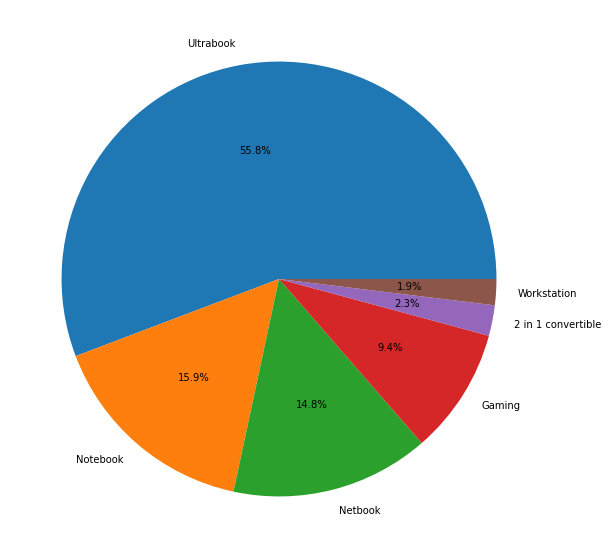

In [58]:
f, ax = plt.subplots(figsize=(10,10))
a = pc['Type']
b = a.value_counts(normalize=True) * 100
my_labels = ['Ultrabook','Notebook', 'Netbook', 'Gaming', '2 in 1 convertible', 'Workstation']
plt.pie(b,labels=my_labels,autopct='%1.1f%%')
plt.show()

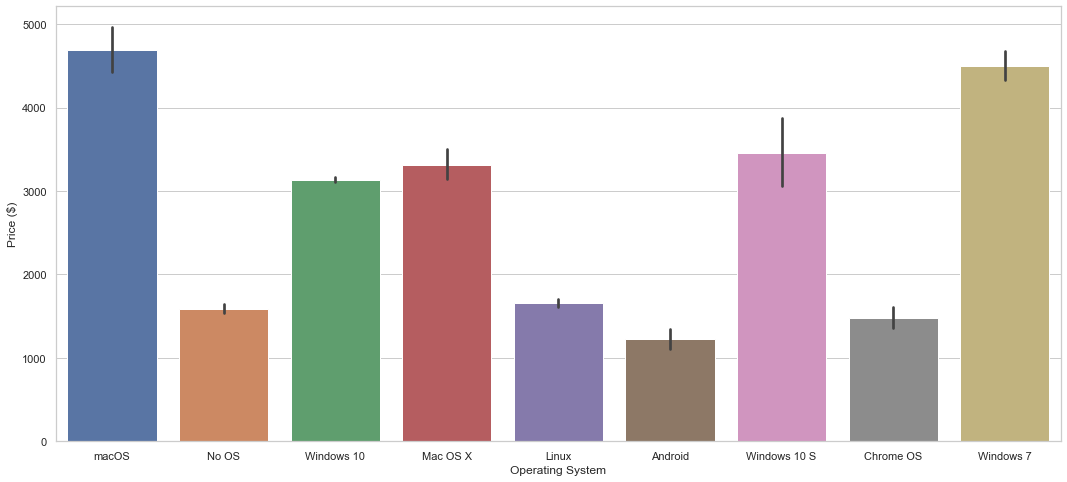

In [77]:
sns.set_theme(style="whitegrid")
plt.figure(1,figsize=(18,8))
ax = sns.barplot(x="Operating System", y="Price ($)", data=pc)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Operating System', ylabel='count'>

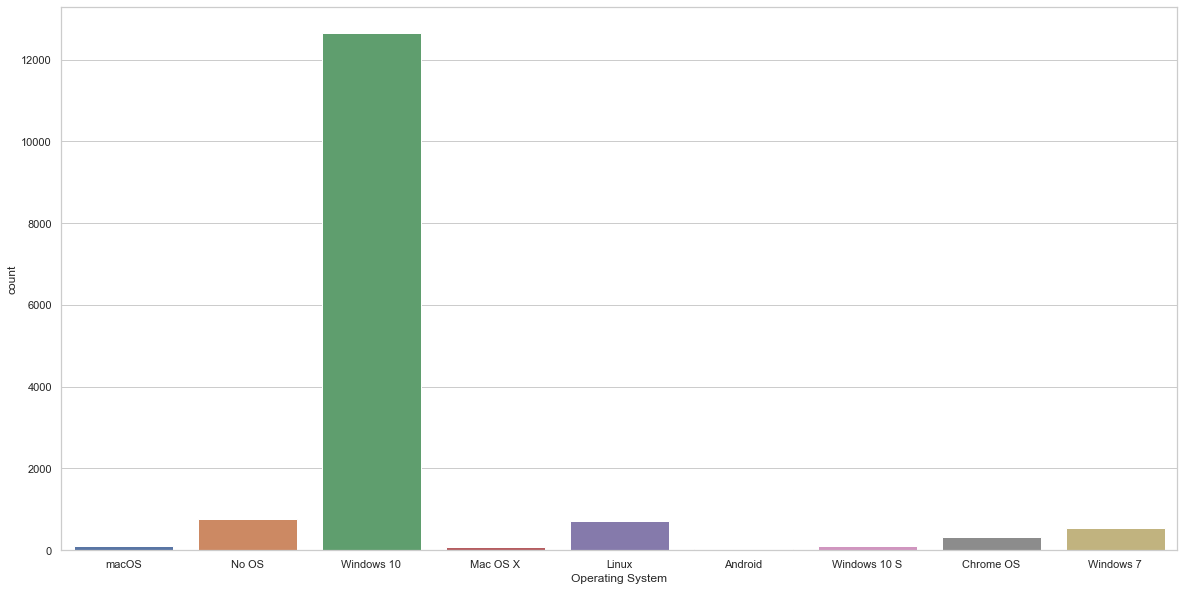

In [86]:
f, ax = plt.subplots(figsize=(20,10))
sns.countplot('Operating System',data = pc)

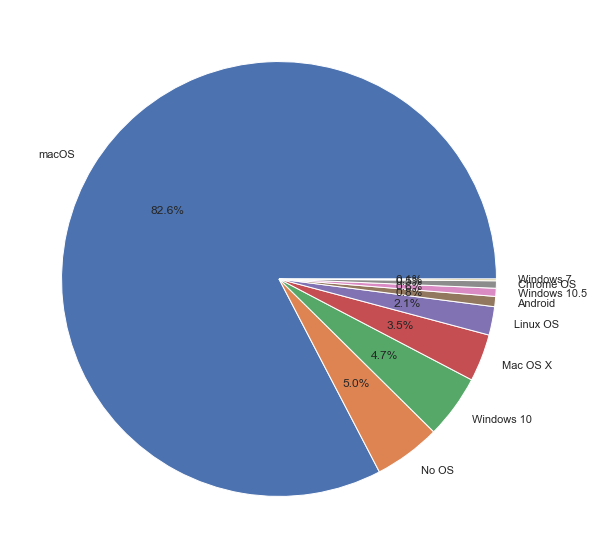

In [87]:
f, ax = plt.subplots(figsize=(10,10))
a = pc['Operating System']
b = pc['Operating System'].value_counts(normalize=True) * 100
my_labels = ['macOS','No OS', 'Windows 10', 'Mac OS X', 'Linux OS', 'Android', 'Windows 10.5', 'Chrome OS', 'Windows 7']
plt.pie(b,labels=my_labels,autopct='%1.1f%%')
plt.show()

# DATA PROCESSING
- Convert RAM and Weight into numeric values
- Splitting of columns


In [5]:
#Covert RAM into numeric
myList=pc["RAM"]
final=[]
for entry in myList:
    final.append(entry.replace('GB', ''))
pc["RAM"]=final
pc["RAM"]

0         8
1         8
2         8
3        16
4         8
         ..
15315     4
15316    16
15317     2
15318     6
15319     4
Name: RAM, Length: 15320, dtype: object

In [6]:
#Covert Weight into numeric
myList=pc["Weight"]
final=[]
for entry in myList:
    final.append(entry.replace('kg', ''))
pc["Weight"]=final
pc["Weight"]

0        1.37
1        1.34
2        1.86
3        1.83
4        1.37
         ... 
15315     1.8
15316     1.3
15317     1.5
15318    2.19
15319     2.2
Name: Weight, Length: 15320, dtype: object

# Feature Engineering
Expand features and create new numeric and categorical features
- Screen Specs – IPS+Screen Resolution+Full HD+Quad HD + Retina+Touch Screen 
- Hard Disk – SSD+HDD+Flash+Hybrid
- CPU- GHZ+AMD+Intel
- GPU- Intel+AMD+Nvidia


In [7]:
#find the resulution of the screen and multiply them together
list1 = pc['Screen Specs'].apply(lambda x: x.split()[-1].split("x")[0]).astype(float)
list2 = pc['Screen Specs'].apply(lambda x: x.split()[-1].split("x")[1]).astype(float)
products = []
for num1, num2 in zip(list1, list2):
    products.append(num1*num2)
pc["Screen Res"]=products
pc["Screen Res"]

0        4096000.0
1        1296000.0
2        2073600.0
3        5184000.0
4        4096000.0
           ...    
15315    2073600.0
15316    5760000.0
15317    1049088.0
15318    1049088.0
15319    1049088.0
Name: Screen Res, Length: 15320, dtype: float64

In [8]:
#find the CPU GHz of CPU
pc["CPU GHz"]= pc["CPU"].apply(lambda x:x.split(" ")[-1])
myList=pc["CPU GHz"]
final=[]
for entry in myList:
    final.append(entry.replace('GHz', ''))
pc["CPU GHz"]=final
pc["CPU GHz"]

0        2.3
1        1.8
2        2.5
3        2.7
4        3.1
        ... 
15315    2.5
15316    2.5
15317    1.6
15318    2.5
15319    1.6
Name: CPU GHz, Length: 15320, dtype: object

In [9]:
#Split Hard Disk then append to categorial column
r= pc["Hard Disk"].apply(lambda x:x.split("+"))  
for i in range(len(r)):
    r[i]= [r[i]]   
SSD=[]
HDD=[]
Flash_Storage=[]
Hybrid=[]
for i in range(len(r)):
    if 'GB SSD' in r[i][0][0]:
        SSD.append(r[i][0][0].replace('GB SSD',''))
    elif 'TB SSD' in r[i][0][0]:
        SSD.append(float(r[i][0][0].replace('TB SSD',''))*1000)
    else:
        SSD.append(0)
for i in range(len(r)):
    if 'GB HDD' in r[i][0][0]:
        HDD.append(r[i][0][0].replace('GB HDD',''))
    elif 'TB HDD' in r[i][0][0]:
        HDD.append(float(r[i][0][0].replace('TB HDD',''))*1000)
    elif len(r[i][0])==2 and 'GB HDD' in r[i][0][1]:
        HDD.append(r[i][0][1].replace('GB HDD',''))
    elif len(r[i][0])==2 and 'TB HDD' in r[i][0][1]:
        HDD.append(float(r[i][0][1].replace('TB HDD',''))*1000)
    else:
        HDD.append(0)
for i in range(len(r)):
    if 'GB Flash Storage' in r[i][0][0]:
        Flash_Storage.append(r[i][0][0].replace('GB Flash Storage',''))
    elif 'TB Flash Storage' in r[i][0][0]:
        Flash_Storage.append(float(r[i][0][0].replace('TB Flash Storage',''))*1000)
    else:
        Flash_Storage.append(0)
for i in range(len(r)):
    if 'GB Hybrid' in r[i][0][0]:
        Hybrid.append(r[i][0][0].replace('GB Hybrid',''))
    elif 'TB Hybrid' in r[i][0][0]:
        Hybrid.append(float(r[i][0][0].replace('TB Hybrid',''))*1000)
    else:
        Hybrid.append(0)
pc['SSD']=SSD
pc['HDD']=HDD
pc['Flash_Storage']=Flash_Storage
pc['Hybrid']=Hybrid

In [10]:
#Split Screen Description then append to categorial column
d= pc["Screen Specs"].apply(lambda x:x.split(" ")[0:-1])
for i in range(len(d)):
    d[i]= [d[i]]  
IPS=[]
Full_HD=[]
Retina=[]
Quad_Hd=[]
Touchscreen=[]
for i in range(len(d)):
    if 'IPS' and 'Panel' in d[i][0]:
        IPS.append(1)
    else:
        IPS.append(0)
for i in range(len(d)):
    if 'Full' and 'HD' in d[i][0]:
        Full_HD.append(1)
    else:
        Full_HD.append(0)
for i in range(len(d)):
    if 'Retina' and 'Panel' in d[i][0]:
        Retina.append(1)
    else:
        Retina.append(0)
for i in range(len(d)):
    if 'Quad' and 'HD+' in d[i][0]:
        Quad_Hd.append(1)
    else:
        Quad_Hd.append(0)
for i in range(len(d)):
    if 'Touchscreen' in d[i][0]:
        Touchscreen.append(1)
    else:
        Touchscreen.append(0)
pc['IPS']=IPS
pc['Full_HD']=Full_HD
pc['Retina']=Retina
pc['Quad_Hd']=Quad_Hd
pc['Touchscreen']=Touchscreen
pc[50:]

,Product ID,Brand,Type,Screen Size,Screen Specs,CPU,RAM,Hard Disk,GPU,Operating System,...,CPU GHz,SSD,HDD,Flash_Storage,Hybrid,IPS,Full_HD,Retina,Quad_Hd,Touchscreen
50,50,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Android,...,1.44,0,0,64,0,1,0,1,0,1
51,51,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce MX150,Windows 10,...,1.8,256,0,0,0,1,1,1,0,0
52,52,HP,Notebook,15.6,Full HD 1920x1080,AMD A6-Series 9220 2.5GHz,4,256GB SSD,AMD Radeon R4 Graphics,Windows 10,...,2.5,256,0,0,0,0,1,0,0,0
53,53,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,...,1.8,512,0,0,0,0,1,0,0,0
54,54,Acer,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,...,2.4,0,1000.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,15315,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,...,2.5,128,0,0,0,1,1,1,0,1
15316,15316,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,...,2.5,512,0,0,0,1,0,1,1,1
15317,15317,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,...,1.6,0,0,64,0,0,0,0,0,0
15318,15318,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,...,2.5,0,1000.0,0,0,0,0,0,0,0


In [11]:
#Split CPU Description then append to categorial column
cpu= pc["CPU"].apply(lambda x:x.split(" ")[0:-1])
for i in range(len(cpu)):
    cpu[i]= [cpu[i]]  
Intel_CPU=[]
AMD_CPU=[]
for i in range(len(cpu)):
    if 'Intel' in cpu[i][0]:
        Intel_CPU.append(' '.join(cpu[i][0]))
    else:
        Intel_CPU.append(0)
for i in range(len(d)):
    if 'AMD' in cpu[i][0]:
        AMD_CPU.append(' '.join(cpu[i][0]))
    else:
        AMD_CPU.append(0)
pc['Intel_CPU']=Intel_CPU
pc['AMD_CPU']=AMD_CPU


In [12]:
#Split GPU Description then append to categorial column
gpu= pc["GPU"].apply(lambda x:x.split(" ")[0:-1])
for i in range(len(gpu)):
    gpu[i]= [gpu[i]]  
Intel_GPU=[]
AMD_GPU=[]
Nvidia_GPU=[]
for i in range(len(gpu)):
    if 'Intel' in gpu[i][0]:
        Intel_GPU.append(' '.join(gpu[i][0]))
    else:
        Intel_GPU.append(0)
for i in range(len(gpu)):
    if 'AMD' in gpu[i][0]:
        AMD_GPU.append(' '.join(gpu[i][0]))
    else:
        AMD_GPU.append(0)
for i in range(len(gpu)):
    if 'Nvidia'in gpu[i][0]:
        Nvidia_GPU.append(' '.join(gpu[i][0]))
    else:
        Nvidia_GPU.append(0)
pc['Intel_GPU']=Intel_GPU
pc['AMD_GPU']=AMD_GPU
pc['Nvidia_GPU']=Nvidia_GPU

I drop the useless column 'Product ID' and dropped the 'Screen Specs', 'CPU', 'Hard Disk' and 'GPU' as I've split them into another column.

In [16]:
pd.set_option('display.max_columns', None)
df= pc.drop(['Product ID','Screen Specs','CPU','Hard Disk','GPU'],axis =1)
df

,Brand,Type,Screen Size,RAM,Operating System,Weight,Price ($),Screen Res,CPU GHz,SSD,HDD,Flash_Storage,Hybrid,IPS,Full_HD,Retina,Quad_Hd,Touchscreen,Intel_CPU,AMD_CPU,Intel_GPU,AMD_GPU,Nvidia_GPU
0,Apple,Ultrabook,13.3,8,macOS,1.37,3568.93416,4096000.0,2.3,128,0,0,0,1,0,1,0,0,Intel Core i5,0,Intel Iris Plus Graphics,0,0
1,Apple,Ultrabook,13.3,8,macOS,1.34,2394.77616,1296000.0,1.8,0,0,128,0,0,0,0,0,0,Intel Core i5,0,Intel HD Graphics,0,0
2,HP,Notebook,15.6,8,No OS,1.86,1531.80000,2073600.0,2.5,256,0,0,0,0,1,0,0,0,Intel Core i5 7200U,0,Intel HD Graphics,0,0
3,Apple,Ultrabook,15.4,16,macOS,1.83,6759.76680,5184000.0,2.7,512,0,0,0,1,0,1,0,0,Intel Core i7,0,0,AMD Radeon Pro,0
4,Apple,Ultrabook,13.3,8,macOS,1.37,4804.79040,4096000.0,3.1,256,0,0,0,1,0,1,0,0,Intel Core i5,0,Intel Iris Plus Graphics,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15315,Lenovo,2 in 1 Convertible,14.0,4,Windows 10,1.8,1706.40200,2073600.0,2.5,128,0,0,0,1,1,1,0,1,Intel Core i7 6500U,0,Intel HD Graphics,0,0
15316,Lenovo,2 in 1 Convertible,13.3,16,Windows 10,1.3,4000.10600,5760000.0,2.5,512,0,0,0,1,0,1,1,1,Intel Core i7 6500U,0,Intel HD Graphics,0,0
15317,Lenovo,Notebook,14.0,2,Windows 10,1.5,616.82600,1049088.0,1.6,0,0,64,0,0,0,0,0,0,Intel Celeron Dual Core N3050,0,Intel HD,0,0
15318,HP,Notebook,15.6,6,Windows 10,2.19,2042.06600,1049088.0,2.5,0,1000.0,0,0,0,0,0,0,0,Intel Core i7 6500U,0,0,AMD Radeon R5,0


Then I split the data into X, which is my features and y, which is my target variable and convert the categorial data 'Brand','Type','Operating System','Intel_CPU','AMD_CPU','Intel_GPU','AMD_GPU','Nvidia_GPU' into numerical data by using LabelEncoder but since LabelEncoder only takes a 1-d array as an argument. I created my own label encoder that operates on multiple columns and returns a transformed dataframe.

In [17]:
y = df['Price ($)'].values
X = df.drop('Price ($)', axis=1).astype(str)

In [89]:
le = preprocessing.LabelEncoder()

# LabelEncoder for a number of columns
class MultiColumnLabelEncoder:

    def __init__(self, columns = None):
        self.columns = columns # list of column to encode
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X=X[['Brand','Type','Operating System','Intel_CPU','AMD_CPU','Intel_GPU','AMD_GPU','Nvidia_GPU']]

        output = X.copy()

        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)

        return output
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

le = MultiColumnLabelEncoder()
X_train_le = le.fit_transform(X)

#From labels to dummy
ohe = OneHotEncoder(sparse=False)
X_train_ohe = ohe.fit_transform(X_train_le)

#Treating continous variables with Standart Scaler
columns = np.array(df[['Screen Size','RAM','Weight','Screen Res','CPU GHz','SSD','HDD','Flash_Storage','Hybrid']])

# Resulted feature matrix with all of independent variables
X_2 = np.concatenate((columns,X_train_ohe),axis=1)
pd.DataFrame(X_2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,13.3,8,1.37,4096000.0,2.3,128,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.3,8,1.34,1296000.0,1.8,0,0,128,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15.6,8,1.86,2073600.0,2.5,256,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15.4,16,1.83,5184000.0,2.7,512,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.3,8,1.37,4096000.0,3.1,256,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,..

In [23]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_2, y,test_size = 0.3, random_state = 42)

I then tested out 2 different types of scalers (StandardScaler and MinMaxScaler) and 
concluded to use MinMaxScaler as the model errors are reduced.

StandardScaler 
- follows a normal-like distribution
    
MinMaxScaler 
- Works well on data that is NOT normally distributed (bell_shaped)
- Does not perform well with outliers

In [131]:
models = {'KnnR': KNeighborsRegressor(),
          'Ridge': KernelRidge(),
          'GBR' : GradientBoostingRegressor(),
          'SVR': SVR(),
          'RForestR': RandomForestRegressor()
         }
Array_Result = pd.DataFrame(columns=["MSE","RMSE","R2","MAE","MAPE"])

for i in models :
    
    pipe = Pipeline([
    ('scaler', StandardScaler()),
    (i, models[i])])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    MSE = mean_squared_error(y_test, y_pred)
    RMSE= np.sqrt(mean_squared_error(y_test, y_pred))
    R2=pipe.score(X_test, y_test)
    MAE= mean_absolute_error(y_test, y_pred)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)
    
    result = pd.DataFrame({"MSE" : [MSE], "RMSE" : [RMSE], "R2" : [R2], "MAE" : [MAE], "MAPE" : [MAPE]})
    Array_Result = Array_Result.append([result])
    
Array_Result.index=list(models.keys())
pd.DataFrame(Array_Result)

,MSE,RMSE,R2,MAE,MAPE
KnnR,1.323033e+04,115.023174,0.996410,30.700296,0.010560
Ridge,9.541903e+06,3088.997113,-1.589228,3001.466488,1.399390
GBR,3.645865e+05,603.809964,0.901068,440.525723,0.165376
SVR,3.526897e+06,1878.003549,0.042964,1312.481332,0.543364
RForestR,1.096007e+04,104.690330,0.997026,27.877765,0.009660


In [133]:
models = {'KnnR': KNeighborsRegressor(),
          'Ridge': KernelRidge(),
          'GBR' : GradientBoostingRegressor(),
          'SVR': SVR(),
          'RForestR': RandomForestRegressor()
         }
Array_Result = pd.DataFrame(columns=["MSE","RMSE","R2","MAE","MAPE"])

for i in models :
    
    pipe = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),
    (i, models[i])])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    MSE = mean_squared_error(y_test, y_pred)
    RMSE= np.sqrt(mean_squared_error(y_test, y_pred))
    R2=pipe.score(X_test, y_test)
    MAE= mean_absolute_error(y_test, y_pred)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)
    
    result = pd.DataFrame({"MSE" : [MSE], "RMSE" : [RMSE], "R2" : [R2], "MAE" : [MAE], "MAPE" : [MAPE]})
    Array_Result = Array_Result.append([result])
    
Array_Result.index=list(models.keys())
pd.DataFrame(Array_Result)


,MSE,RMSE,R2,MAE,MAPE
KnnR,1.363074e+04,116.750746,0.996301,30.501045,0.010276
Ridge,5.371366e+05,732.896024,0.854246,514.785620,0.184825
GBR,3.645865e+05,603.809964,0.901068,440.525723,0.165376
SVR,3.284668e+06,1812.365185,0.108694,1253.955687,0.510157
RForestR,1.097408e+04,104.757256,0.997022,27.907155,0.009685


I used the GridSerachCV function in the sklearn module. GridSearchCV carries out an interative search over 
specified parameter values for an estimator. For example, for my RandomForest model, I used GridSearchCV to 
determine the best hyperparameter (max_features,n_estimators,max_depth, that makes the model perform 
best with a list of parameters.

In [38]:
models = {'KnnR': KNeighborsRegressor(),
          'Ridge': KernelRidge(),
          'GBR' :GradientBoostingRegressor(),
          'SVR': SVR(),
          'RForestR': RandomForestRegressor()
         }

params={
    'KnnR':{
        'KnnR__weights': ['uniform', 'distance'],
        'KnnR__leaf_size': np.arange(5,45,5),
        'KnnR__n_neighbors': np.arange(5,20,5),
        'KnnR__p':[1,2]
    },
    'Ridge':{
        'Ridge__alpha':[200, 230, 260, 275, 290, 305, 400]
    },
    'GBR':{
        'GBR__learning_rate': [0.01,0.02,0.04],
        'GBR__subsample'    : [0.9, 0.5, 0.1],
        'GBR__n_estimators' : [100,500,1000]
    },
    'SVR':{
        'SVR__C': [0.1,1, 10], 
        'SVR__gamma': [1,0.1,0.01]  
    },
    'RForestR':{
        'RForestR__max_features':['auto','sqrt'],
        'RForestR__n_estimators':np.arange(100,800,200),
        'RForestR__max_depth':np.arange(1,60,10)
    }
}

for i in models:
    pipe=Pipeline([('MinMaxScaler', MinMaxScaler()),(i,models[i])])
    pipe = GridSearchCV(pipe, params[i],cv=5,n_jobs=-1, verbose=2)
    pipe.fit(X_train, y_train)
    #Find best scores for KNN
    print(f"{i}:")
    print(f"Best Score: {pipe.best_score_}")
    print(f"Best Parameters: {pipe.best_params_}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
KnnR:
Best Score: 0.9968782514959443
Best Parameters: {'KnnR__leaf_size': 5, 'KnnR__n_neighbors': 10, 'KnnR__p': 2, 'KnnR__weights': 'distance'}
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Ridge:
Best Score: 0.7501536254723791
Best Parameters: {'Ridge__alpha': 200}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
GBR:
Best Score: 0.9549507864808315
Best Parameters: {'GBR__learning_rate': 0.04, 'GBR__n_estimators': 1000, 'GBR__subsample': 0.5}
Fitting 5 folds for each of 9 candidates, totalling 45 fits
SVR:
Best Score: 0.4898748714698522
Best Parameters: {'SVR__C': 10, 'SVR__gamma': 0.1}
Fitting 5 folds for each of 48 candidates, totalling 240 fits
RForestR:
Best Score: 0.9966677900716256
Best Parameters: {'RForestR__max_depth': 51, 'RForestR__max_features': 'sqrt', 'RForestR__n_estimators': 300}


In [53]:
models = {'KnnR': KNeighborsRegressor(leaf_size= 5,
                                      n_neighbors= 10,
                                      p= 2,
                                      weights= 'distance'),
          'Ridge': KernelRidge(alpha= 200),
          'GBR' : GradientBoostingRegressor(learning_rate= 0.04,
                                            n_estimators= 1000,
                                            subsample= 0.5),
          'SVR': SVR(C= 10,
                     gamma= 0.1),
          'RForestR': RandomForestRegressor(max_depth= 51,
                                            max_features= 'sqrt',
                                            n_estimators= 300),
          'Dummy':DummyRegressor(strategy="mean")
         }
Array_Result = pd.DataFrame(columns=["MSE","RMSE","R2","MAE","MAPE"])

for i in models :
    
    pipe = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),
    (i, models[i])])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    cv_Train=np.mean(cross_val_score(pipe, X_train, y_train, cv=10, n_jobs=-1))
    cv_Test=np.mean(cross_val_score(pipe, X_test, y_test, cv=10, n_jobs=-1))
    print(f"Training Data: {i} score: {cv_Train}")
    print(f"Testing Data: {i} score: {cv_Test}")
    
    MSE = mean_squared_error(y_test, y_pred)
    RMSE= np.sqrt(mean_squared_error(y_test, y_pred))
    R2=pipe.score(X_test, y_test)
    MAE= mean_absolute_error(y_test, y_pred)
    MAPE= mean_absolute_percentage_error(y_test, y_pred)
    
    result = pd.DataFrame({"MSE" : [MSE], "RMSE" : [RMSE], "R2" : [R2], "MAE" : [MAE], "MAPE" : [MAPE]})
    Array_Result = Array_Result.append([result])
    
Array_Result.index=list(models.keys())
pd.DataFrame(Array_Result)

Training Data: KnnR score: 0.9966456524866418
Testing Data: KnnR score: 0.9919568271203749
Training Data: Ridge score: 0.7575967310485617
Testing Data: Ridge score: 0.6998764469895622
Training Data: GBR score: 0.9546568479487739
Testing Data: GBR score: 0.9561024991814028
Training Data: SVR score: 0.5107065559655022
Testing Data: SVR score: 0.3223150835204667
Training Data: RForestR score: 0.9967347645706786
Testing Data: RForestR score: 0.9915703496407884
Training Data: Dummy score: -0.0018468737685169323
Testing Data: Dummy score: -0.001774133634265551


,MSE,RMSE,R2,MAE,MAPE
KnnR,1.142293e+04,106.878092,0.996900,27.321016,0.009473
Ridge,8.929433e+05,944.956774,0.757697,656.626059,0.240632
GBR,1.642286e+05,405.251221,0.955436,293.081613,0.110394
SVR,1.863765e+06,1365.197872,0.494261,836.304290,0.281258
RForestR,1.094296e+04,104.608620,0.997031,27.511367,0.009548
Dummy,3.691224e+06,1921.255758,-0.001626,1445.556373,0.700275


From the table above:
 - KnnR has the lowest mean absolute error
 - Ridge and SVR has very high mean absolute percentage error
 - GBR has relatively low errors
 - SVR has the most errors
 - RForestR has the least errors


 If the chosen model fits worse than a horizontal line, then R2 is negative. R2 is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

Here all the other models have better MSE, RMSE, R2, MAE, MAPE than the dummy, which is used as a stupid baseline and makes predictions using simple rules, so my sytem works a lot better than the baseline.
This regressor is useful as a simple baseline to compare with other (real) regressors.

# Evaluation
I now then compute the training and testing scores to decide whether the data is Overfitting or underfitting or appropriatelyfitted.
As seen above the scores of the training and testing data for each model are relatively similar so the data is appropriately fitted.

Is it possible to say something about which features the model considers 
important?

The features used by the model reflects as the returned scores, so it is a must to make sure that the important feature does not have other
variables affecting it to perform better, such as outliers and null values.

# Conclusion:

My RandomForest model is the best model out of all the other models with the lowest root mean square deviation, highest R2, 2nd lowest mean absolute error and the lowest mean absolute percentage error.